In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('flight_delays 1.csv', header = 0, sep=',')

In [3]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [4]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].apply(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].apply(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].apply(int)
df_delay   = df[df.dep_delayed_15min==1]
df_nodelay = df[df.dep_delayed_15min==0]
delays          = len(df_delay)
nodelays        = len(df_nodelay)
airlines        = sorted(df.UniqueCarrier.unique())
origins         = sorted(df.Origin.unique(), reverse=True)
destinations    = sorted(df.Dest.unique(), reverse=True)
numAirlines     = len(airlines)
numOrigins      = len(origins)
numDestinations = len(destinations)
minDist         = df.Distance.min()
maxDist         = df.Distance.max()

In [5]:
do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

In [6]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


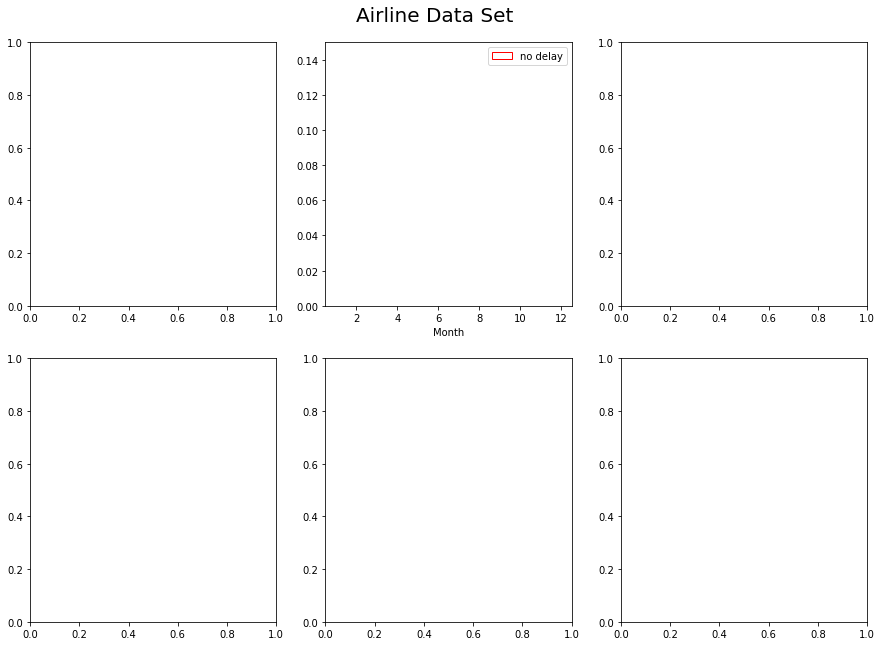

In [9]:
'''
Make plots of feature distributions within the delay and no-delay subsamples, 
so we can get some idea of which features are likely to be most useful.
'''
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots( nrows=2, ncols=3, figsize=(15,10) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.93 )
plt.suptitle("Airline Data Set", fontsize=20)
Ycol = ["blue"]
Ncol = ["red"]

axes[0,1].hist(df_delay.Month)
axes[0,1].hist(df_nodelay.Month,bins=12,range=[0.4,12.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
axes[0,1].set_xlabel("Month")
axes[0,1].set_xlim(0.5,12.5)
axes[0,1].set_ylim(0.0,0.15)
axes[0,1].legend(prop={'size': 10},loc="upper right")

axes[0,2].hist(df_delay.DayofMonth,bins=31,range=[0.5,31.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
axes[0,2].hist(df_nodelay.DayofMonth,bins=31,range=[0.4,31.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
axes[0,2].set_xlabel("Day of Month")
axes[0,2].set_xlim(0.5,31.5)
axes[0,2].set_ylim(0.0,0.05)
axes[0,2].legend(prop={'size': 10},loc="upper right")

axes[1,0].hist(df_delay.DayOfWeek,bins=7,range=[0.5,7.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
axes[1,0].hist(df_nodelay.DayOfWeek,bins=7,range=[0.4,7.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
axes[1,0].set_xlabel("Day of Week")
axes[1,0].set_xlim(0.5,7.5)
axes[1,0].set_ylim(0.0,0.25)
axes[1,0].legend(prop={'size': 10},loc="upper right")

axes[1,1].hist(df_delay.DepTime,bins=24,range=[0,2400],
               color=Ycol,histtype="step",label="delay",density=True)
axes[1,1].hist(df_nodelay.DepTime,bins=24,range=[0,2400],
               color=Ncol,histtype="step",label="no delay",density=True)
axes[1,1].set_xlabel("Departure Time")
axes[1,1].set_xlim(0.0,2400.0)
axes[1,1].set_ylim(0.0,0.0012)
axes[1,1].legend(prop={'size': 10},loc="upper right")

axes[1,2].hist(df_delay.Distance,bins=50,range=[0,4000],
               color=Ycol,histtype="step",label="delay",density=True)
axes[1,2].hist(df_nodelay.Distance,bins=50,range=[0,4000],
               color=Ncol,histtype="step",label="no delay",density=True)
axes[1,2].set_xlabel("Distance")
axes[1,2].set_ylim(0.0,0.0014)
axes[1,2].legend(prop={'size': 10},loc="upper right")
plt.show()
#fig.savefig('FlightDelayFeatures1.png', dpi=200, bbox_inches='tight')

fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )
bins      = np.arange(numAirlines)
heights   = df.groupby(["UniqueCarrier","dep_delayed_15min"]).size()
mulind    = pd.MultiIndex.from_product([airlines, [False, True]])
heights   = heights.reindex(mulind).replace(np.nan, 0)
heights1  = [heights[carrier,True] for carrier in airlines]
heights1  = [float(height)/sum(heights1) for height in heights1]
heights2  = [heights[carrier,False] for carrier in airlines]
heights2  = [float(height)/sum(heights2) for height in heights2]
axes.bar(bins,heights1,align="center",edgecolor=Ycol,color=["none"],label="delay")
axes.bar(bins-0.05,heights2,align="center",edgecolor=Ncol,color=["none"],label="no delay")
axes.set_xlabel("Carrier",fontsize=15)
axes.set_xticks(bins)
axes.set_xticklabels(airlines, ha="center", rotation=45.)
axes.set_xlim([-0.5,bins.size-0.5])
axes.set_ylim(0.0,0.20)
axes.legend(prop={'size': 10},loc="upper right")

plt.show()
#fig.savefig('FlightDelayFeatures2.png', dpi=200, bbox_inches='tight')